<a href="https://colab.research.google.com/github/Evianitary18/Programming-With-Python/blob/main/FINPRO_CLEANING_Nita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal

Platform masa depanku merupakan startup edutech yang memberikan pelayanan akses pembelajaran tambahan melalui fitur lms yang mana penggunanya dapat mendaftarkan diri pada kelas -kelas pembelajaran online untuk menunjang skill kerja dan portofolio.
Dengan banyaknya pengguna yang dimiliki platform tersebut, tentunya perusahaan memiliki data yang cukup besar. Namun, pengelolaan data yang dimiliki belum termaksimalkan dengan baik sebagai dasar pengambilan keputusan.
Maka dari itu, stakeholder membutuhkan suatu media seperti dashboard yang menampilkan informasi secara uptodate untuk melihat metrik-metrik yang relevan dengan kebutuhan bisnis seperti jumlah pengguna, jumlah kelas, tingkat penyelesaian kelas dll.
Tidak hanya dashboard, stakeholders juga memiliki pertanyaan bisnis yang diharapkan dapat dijawab dengan ketersediaan data yang dimiliki saat ini. Jawaban yang diberikan harapnnya dapat membanti stake holder dalam pengambilan keputusan berbasis data kedepannya.


Maka dari itu, stakeholder membutuhkan suatu media seperti dashboard yang menampilkan informasi secara uptodate untuk melihat metrik-metrik yang relevan dengan kebutuhan bisnis seperti jumlah pengguna, jumlah kelas, tingkat penyelesaian kelas dll.
Tidak hanya dashboard, stakeholders juga memiliki pertanyaan bisnis yang diharapkan dapat dijawab dengan ketersediaan data yang dimiliki saat ini. Jawaban yang diberikan harapnnya dapat membanti stake holder dalam pengambilan keputusan berbasis data kedepannya.


# Persiapan

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
import statsmodels.api as sa
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
# code untuk menghilangkan warning message saat menjalankan code di bawah
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data kita ke sebuah dataframe bernamaa
df_project = pd.read_excel('Project4_1A.xlsx')
df_project.head()

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,Sangat baik.


# Eksplorasi Data

In [4]:
df_project.shape

(5430, 16)

In [5]:
df_project

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,Sangat baik.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,5426,938bf00b10f984aeb504a54977f2613b,Fat*******************,2000-01-04,Laki-laki,fb41f1657e2c2edf6b9c86753022f6c9,Tea***********************,Pendidikan & Pelatihan,2023-10-18 12:13:22,2023-10-18 12:14:45,NaT,1,26,NaN,NaN,NaN
5426,5427,ff620890bf8b6331a1270b441b9a2623,LIS**,1993-08-04,Perempuan,6d89a47b116dc3fd794d001d4df394a2,Men*******************************************...,Teknologi (IT),2023-10-18 14:36:59,2023-10-23 06:12:16,NaT,7,21,0.0,NaN,NaN
5427,5428,606b2531d04332f012c451046d0172d3,San*****,1974-04-04,Female,d0a261660d3b3f7b818eb1b377fe1aae,Men**********************************,Perencanaan Bisnis,2023-10-19 06:21:03,2023-10-23 13:18:41,NaT,3,25,NaN,NaN,NaN
5428,5429,a2edfd70e77158beeb086dfb4feb114d,REY******,1998-02-14,Male,1bbc33c05ea4bcc59386b13dfac009b0,Cus*******************************************...,Marketing,2023-10-19 09:39:38,2023-10-23 15:31:55,NaT,3,22,0.0,NaN,NaN


In [6]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          5430 non-null   int64         
 1   id_pengguna             5430 non-null   object        
 2   nama_pengguna           5430 non-null   object        
 3   tanggal_lahir           5364 non-null   datetime64[ns]
 4   jenis_kelamin           5430 non-null   object        
 5   id_kelas                5430 non-null   object        
 6   nama_kelas              5430 non-null   object        
 7   bidang_studi            5430 non-null   object        
 8   tanggal_mendaftar       5430 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  5430 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4912 non-null   datetime64[ns]
 11  aktivitas_selesai       5430 non-null   int64         
 12  total_aktivitas         5430 non-null   int64   

In [7]:
# ubah rating_kelas ke object
#df.rating_kelas = df.rating_kelas.astype('object')

In [8]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          5430 non-null   int64         
 1   id_pengguna             5430 non-null   object        
 2   nama_pengguna           5430 non-null   object        
 3   tanggal_lahir           5364 non-null   datetime64[ns]
 4   jenis_kelamin           5430 non-null   object        
 5   id_kelas                5430 non-null   object        
 6   nama_kelas              5430 non-null   object        
 7   bidang_studi            5430 non-null   object        
 8   tanggal_mendaftar       5430 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  5430 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4912 non-null   datetime64[ns]
 11  aktivitas_selesai       5430 non-null   int64         
 12  total_aktivitas         5430 non-null   int64   

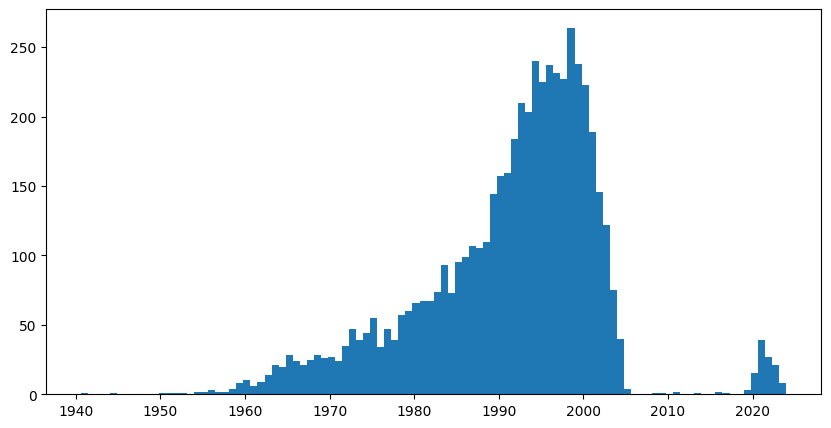

In [9]:
# lihat distribusi tanggal_lahir
plt.figure(figsize=(10,5))
plt.hist(df_project.tanggal_lahir, bins=100)
plt.show()

# Cleaning data

## missing value

In [10]:
#melakukan cek missing value
missing_values = df_project.isnull().sum()
if missing_values.sum() == 0:
    print('Tidak ada missing value')
else:
    print('Terdapat missing value', missing_values)

Terdapat missing value id_pendaftaran              0
id_pengguna                 0
nama_pengguna               0
tanggal_lahir              66
jenis_kelamin               0
id_kelas                    0
nama_kelas                  0
bidang_studi                0
tanggal_mendaftar           0
tanggal_terakhir_akses      0
tanggal_menyelesaikan     518
aktivitas_selesai           0
total_aktivitas             0
skor_akhir                830
rating_kelas              521
review_kelas              521
dtype: int64


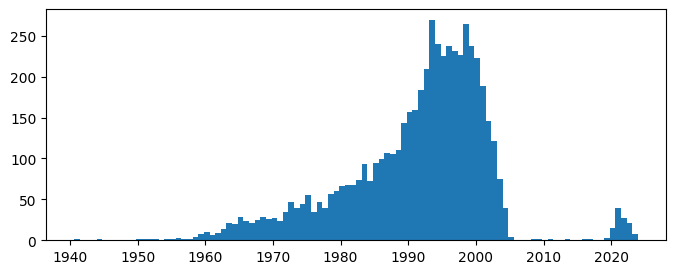

In [16]:
plt.figure(figsize=(8, 3))
plt.hist(df_project.tanggal_lahir, bins=100)
plt.show()

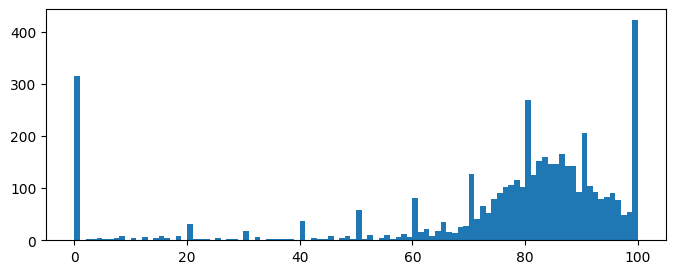

In [12]:
plt.figure(figsize=(8, 3))
plt.hist(df_project.skor_akhir, bins=100)
plt.show()

In [13]:
# ganti missing dengan median
df_project.tanggal_lahir = df_project.tanggal_lahir.fillna(df_project.tanggal_lahir.median())
df_project.tanggal_menyelesaikan = df_project.tanggal_menyelesaikan.fillna(df_project.tanggal_menyelesaikan.median())
df_project.skor_akhir = df_project.skor_akhir.fillna(df_project.skor_akhir.median())

In [14]:
# ganti missing value pada rating kelas dengan median
df_project.rating_kelas = df_project.rating_kelas.fillna(df_project.rating_kelas.median())

# ganti missing value pada review kelas dengan string
df_project['review_kelas'] = df_project['review_kelas'].fillna("review belum terisi")
df_project['review_kelas'] = df_project['review_kelas'].apply(lambda x: "review sudah terisi" if x != "review belum terisi" else x)

In [15]:
# cek missing
df_project.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,0
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


## duplikat

In [17]:
df_project.duplicated().sum()

0

## typo

In [18]:
# id_pendaftaran
df_project.id_pendaftaran.unique()

array([   1,    2,    3, ..., 5428, 5429, 5430])

In [19]:
# id_pengguna
df_project.id_pengguna.unique()

array(['80c253a2888fc16e3d7109622d3f9747',
       'a96f131b42a5c14f62d0d02dd322c9c6',
       'd4a81886022faa38ee6a1456a4eb1e0b', ...,
       '606b2531d04332f012c451046d0172d3',
       'a2edfd70e77158beeb086dfb4feb114d',
       '0479b2191760127a9d3fee6d66e453ff'], dtype=object)

In [20]:
# nama_pengguna
df_project.nama_pengguna.unique()

array(['Mah****', 'Put**************', 'JAK********', ..., 'LIS**',
       'San*****', 'REY******'], dtype=object)

In [21]:
# ubah ke uppercase
df_project.nama_pengguna = df_project.nama_pengguna.str.upper()

In [22]:
df_project.nama_pengguna.unique()

array(['MAH****', 'PUT**************', 'JAK********', ..., 'LIS**',
       'SAN*****', 'REY******'], dtype=object)

In [23]:
# tanggal_lahir
df_project.tanggal_lahir.unique()

<DatetimeArray>
['2001-01-06 00:00:00', '1995-09-10 00:00:00', '1993-05-11 00:00:00',
 '1990-01-30 00:00:00', '1990-11-01 00:00:00', '1999-04-10 00:00:00',
 '1993-01-10 00:00:00', '1995-09-12 00:00:00', '1997-05-20 00:00:00',
 '1994-11-18 00:00:00',
 ...
 '1983-05-02 00:00:00', '1999-08-17 00:00:00', '1996-02-16 00:00:00',
 '1989-08-28 00:00:00', '1983-11-11 00:00:00', '1988-03-03 00:00:00',
 '2000-01-04 00:00:00', '1993-08-04 00:00:00', '1974-04-04 00:00:00',
 '2001-11-01 00:00:00']
Length: 4126, dtype: datetime64[ns]

In [24]:
# ubah ke date
df_project.tanggal_lahir = df_project.tanggal_lahir.dt.date
df_project.tanggal_lahir.unique()

array([datetime.date(2001, 1, 6), datetime.date(1995, 9, 10),
       datetime.date(1993, 5, 11), ..., datetime.date(1993, 8, 4),
       datetime.date(1974, 4, 4), datetime.date(2001, 11, 1)],
      dtype=object)

In [25]:
df_project.tanggal_lahir.value_counts()

,count
tanggal_lahir,
1993-06-23,68
1993-01-01,7
1999-10-10,6
1997-12-20,5
1999-05-10,5
...,...
1975-12-02,1
1980-09-30,1
1994-01-22,1


In [26]:
# jenis_kelamin
df_project.jenis_kelamin.unique()

array(['Perempuan', 'Laki-laki', 'Male', 'Female'], dtype=object)

In [27]:
# ubah Male ke Laki-laki dan female ke perempuan
df_project.jenis_kelamin = df_project.jenis_kelamin.replace(['Male', 'Female'], ['Laki-laki', 'Perempuan'])
df_project.jenis_kelamin.unique()

array(['Perempuan', 'Laki-laki'], dtype=object)

In [28]:
# id_kelas
df_project.id_kelas.value_counts()

,count
id_kelas,
89ecd896ec4b7ee6bbdab2f06faddaa8,391
262cf9b725395d261f41ca335b0418c5,382
f92280d5caee89a6e423487224181eb3,170
6acf2a7bed7aa1b5dee0c8c2e2561fee,123
85deac299e10014ac54f9a4e32f230ef,99
...,...
9dbf2e8e4a3c7155cf18cd52e88756de,1
04c326296698aba4de026672f0d81f59,1
254acc47a47c559777157dccd12b48e8,1


In [29]:
# nama_kelas
df_project.nama_kelas.value_counts()

,count
nama_kelas,
Men***************************************************,406
Men***********************************,396
Pen************************************************,174
Men****************************************************,158
Dig**************,123
...,...
Bel*****************************************************************,1
Ana************************************************,1
Fre**********************************************,1


In [30]:
# bidang_studi
df_project.bidang_studi.value_counts()

,count
bidang_studi,
Pendidikan & Pelatihan,429
Bisnis Manajemen,400
Digital & Teknologi,285
Bisnis Layanan,254
Teknologi (IT),171
...,...
Pembuatan media belajar,1
IPS,1
Teknologi Jaringan Brbasis Luas (WAN),1


In [31]:
# tanggal_mendaftar
df_project.tanggal_mendaftar.value_counts()

,count
tanggal_mendaftar,
2020-09-10 00:00:00,101
2020-09-11 00:00:00,60
2021-03-03 00:00:00,53
2020-09-25 00:00:00,46
2020-08-29 00:00:00,46
...,...
2021-09-15 19:15:12,1
2021-09-15 19:31:51,1
2021-09-15 19:37:15,1


In [32]:
# tanggal_terakhir_akses
df_project.tanggal_terakhir_akses.value_counts()

,count
tanggal_terakhir_akses,
2023-09-18 16:15:18,1040
2022-03-16 23:04:33,18
2022-05-25 06:25:37,13
2022-06-24 02:39:24,4
2021-12-09 14:30:07,4
...,...
2021-04-13 08:42:58,1
2021-04-13 09:53:49,1
2021-04-17 07:25:41,1


In [33]:
# tanggal_menyelesaikan
df_project.tanggal_menyelesaikan.value_counts()

,count
tanggal_menyelesaikan,
2021-08-28 05:00:42.500,518
2021-03-28 19:43:28.000,3
2023-08-30 05:04:05.000,3
2022-03-29 04:08:08.000,2
2021-04-01 16:34:12.000,2
...,...
2021-03-04 12:42:53.000,1
2021-03-03 13:57:15.000,1
2021-03-03 12:08:49.000,1


In [34]:
# aktivitas_selesai
df_project.aktivitas_selesai.value_counts()

,count
aktivitas_selesai,
20,466
7,411
23,402
10,195
0,178
...,...
103,1
84,1
130,1


In [35]:
# skor_akhir
df_project.skor_akhir.value_counts()

,count
skor_akhir,
82.50,864
100.00,407
0.00,316
80.00,205
90.00,165
...,...
73.25,1
84.30,1
95.75,1


In [36]:
# rating_kelas
df_project.rating_kelas.value_counts()

,count
rating_kelas,
5.0,5049
4.0,311
3.0,50
1.0,13
2.0,7


In [37]:
# review_kelas
df_project.review_kelas.value_counts()

,count
review_kelas,
review sudah terisi,4909
review belum terisi,521


In [38]:
# ubah review_kelas ke lowercase
df_project.review_kelas = df_project.review_kelas.str.lower()

In [39]:
# ubah \n menjadi (,)
df_project.review_kelas = df_project.review_kelas.str.replace('\n', ', ')

In [40]:
df_project.review_kelas.value_counts()

,count
review_kelas,
review sudah terisi,4909
review belum terisi,521


## Outlier

In [41]:
# Membuat fungsi cek outlier
def cek_outlier(data, nama_kolom, batas):

    Q1 = np.percentile(data[nama_kolom], 25)
    Q3 = np.percentile(data[nama_kolom], 75)
    IQR = Q3 - Q1

    if batas == 'upper_bound':
        bound = np.where(data[nama_kolom] > (Q3 + 1.5 * IQR))
    elif batas == 'lower_bound':
        bound = np.where(data[nama_kolom] < (Q1 - 1.5 * IQR))
    else:
        raise ValueError("Parameter 'batas' harus 'upper_bound' atau 'lower_bound'.")

    return list(bound[0])

In [42]:
# Menjalankan fungsi untuk mendapatkan indeks yang merupakan outlier pada kolom 'skor_akhir'
upper_skor_akhir= cek_outlier(df_project, 'skor_akhir', 'upper_bound')
print("Indeks outlier upper bound untuk kolom 'skor_akhir':", upper_skor_akhir)

lower_skor_akhir= cek_outlier(df_project, 'skor_akhir', 'lower_bound')
print("Indeks outlier lower bound untuk kolom 'skor_akhir':", lower_skor_akhir)

# Menampilkan jumlah total outlier pada kolom 'price'
print(f"Jumlah total outlier pada kolom 'skor_akhir' sebanyak: {len(upper_skor_akhir) + len(lower_skor_akhir)}")


Indeks outlier upper bound untuk kolom 'skor_akhir': []
Indeks outlier lower bound untuk kolom 'skor_akhir': [1, 5, 6, 7, 11, 12, 15, 16, 17, 19, 21, 22, 24, 25, 26, 28, 29, 32, 34, 37, 38, 40, 41, 46, 50, 51, 56, 57, 58, 59, 61, 65, 66, 68, 74, 76, 77, 81, 83, 84, 92, 93, 94, 95, 98, 100, 108, 109, 113, 114, 121, 123, 126, 139, 147, 154, 158, 164, 167, 170, 172, 177, 178, 181, 183, 190, 191, 192, 194, 195, 201, 203, 204, 205, 211, 213, 214, 215, 216, 218, 219, 220, 221, 222, 225, 226, 227, 228, 231, 232, 234, 235, 236, 240, 241, 243, 245, 246, 248, 251, 252, 253, 256, 257, 258, 259, 261, 262, 264, 266, 269, 272, 276, 279, 281, 284, 286, 291, 293, 294, 295, 297, 298, 299, 304, 305, 307, 308, 309, 310, 312, 315, 321, 325, 329, 339, 341, 343, 346, 353, 356, 359, 360, 361, 362, 366, 368, 369, 371, 372, 377, 380, 381, 386, 403, 404, 408, 420, 432, 465, 466, 481, 483, 498, 499, 513, 527, 537, 544, 549, 556, 559, 565, 568, 571, 572, 573, 603, 608, 620, 633, 640, 641, 642, 643, 646, 652, 665,

In [43]:
# Menjalankan fungsi untuk mendapatkan indeks yang merupakan outlier pada kolom 'aktivitas_selesai'
upper_aktivitas_selesai = cek_outlier(df_project, 'aktivitas_selesai', 'upper_bound')
print("Indeks outlier upper bound untuk kolom 'aktivitas_selesai':", upper_aktivitas_selesai)

lower_aktivitas_selesai = cek_outlier(df_project, 'aktivitas_selesai', 'lower_bound')
print("Indeks outlier lower bound untuk kolom 'aktivitas_selesai':", lower_aktivitas_selesai)

# Menampilkan jumlah total outlier pada kolom 'aktivitas_selesai'
print(f"Jumlah total outlier pada kolom 'aktivitas_selesai' sebanyak: {len(upper_aktivitas_selesai) + len(lower_aktivitas_selesai)}")


Indeks outlier upper bound untuk kolom 'aktivitas_selesai': [2614, 2615, 2630, 2631, 2637, 2657, 2661, 2667, 2671, 2698, 2708, 2742, 2760, 2782, 2798, 2804, 2814, 2819, 2825, 2827, 2840, 2843, 2858, 2879, 2885, 2908, 2916, 2925, 2940, 2945, 2949, 2959, 2984, 3095, 3118, 3134, 3141, 3150, 3177, 3190, 3200, 3234, 3236, 3263, 3274, 3291, 3390, 3393, 3401, 3445, 3509, 3517, 3522, 3659, 3672, 3705, 3871, 3934, 3979, 4032, 4194, 4212, 4336, 4429, 4464, 4612, 4732, 4751, 4906, 4990]
Indeks outlier lower bound untuk kolom 'aktivitas_selesai': []
Jumlah total outlier pada kolom 'aktivitas_selesai' sebanyak: 70


In [44]:
# Menjalankan fungsi untuk mendapatkan indeks yang merupakan outlier pada kolom 'total_aktivitas'
upper_total_aktivitas = cek_outlier(df_project, 'total_aktivitas', 'upper_bound')
print("Indeks outlier upper bound untuk kolom 'total_aktivitas':", upper_total_aktivitas)

lower_total_aktivitas = cek_outlier(df_project, 'total_aktivitas', 'lower_bound')
print("Indeks outlier lower bound untuk kolom 'total_aktivitas':", lower_total_aktivitas)

# Menampilkan jumlah total outlier pada kolom 'total_aktivitas'
print(f"Jumlah total outlier pada kolom 'total_aktivitas' sebanyak: {len(upper_total_aktivitas) + len(lower_total_aktivitas)}")


Indeks outlier upper bound untuk kolom 'total_aktivitas': [4990]
Indeks outlier lower bound untuk kolom 'total_aktivitas': []
Jumlah total outlier pada kolom 'total_aktivitas' sebanyak: 1


In [45]:
#fungsi untuk memfilter outlier
def filter_outlier(df_project, nama_kolom):

    # Mengambil indeks outlier upper dan lower bound
    upper_bound = cek_outlier(df_project, nama_kolom, 'upper_bound')
    lower_bound = cek_outlier(df_project, nama_kolom, 'lower_bound')

    # Menghapus baris yang merupakan outlier
    df_filtered = df_project.loc[~df_project.index.isin(upper_bound + lower_bound)]

    return df_filtered


In [46]:
# memanggil fungsi filter_outlier 'skor_akhir'
df_p1 = filter_outlier(df_project, 'skor_akhir')
print(df_p1.shape)

(4806, 16)


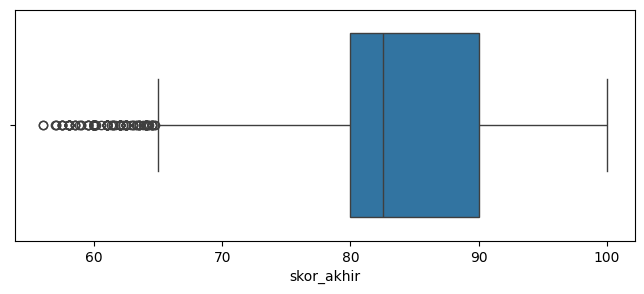

In [47]:
#menampilkan visualisasi
plt.figure(figsize=(8, 3))
sns.boxplot(x= 'skor_akhir', data=df_p1)
plt.show()

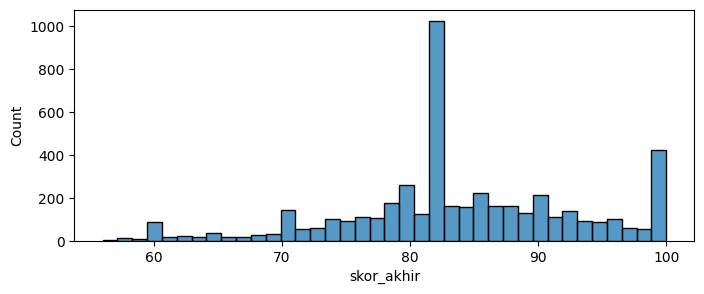

In [48]:
#menampilkan visualisasi
plt.figure(figsize=(8, 3))
sns.histplot(x= 'skor_akhir', data=df_p1)
plt.show()

In [49]:
# memanggil fungsi filter_outlier, menggunakan dataframe data1 di atas
df_p2 = filter_outlier(df_p1, 'aktivitas_selesai')
print(df_p2.shape)

(4778, 16)


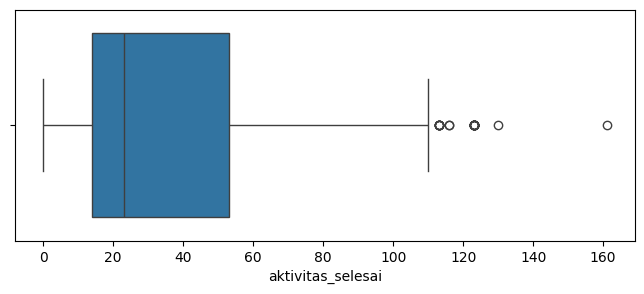

In [50]:
#menampilkan visualisasi
plt.figure(figsize=(8, 3))
sns.boxplot(x= 'aktivitas_selesai', data=df_p2)
plt.show()

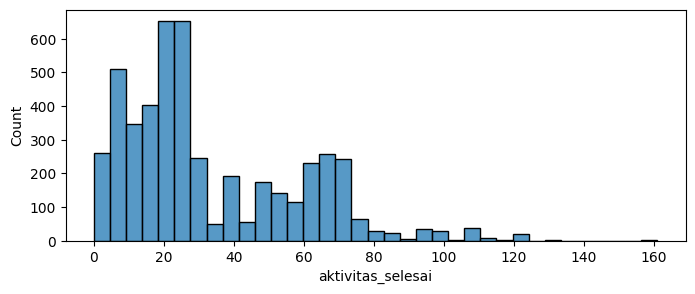

In [51]:
#menampilkan visualisasi
plt.figure(figsize=(8, 3))
sns.histplot(x= 'aktivitas_selesai', data=df_p2)
plt.show()

In [52]:
#import ribrary
from scipy import stats

In [53]:
# Menggunakan z-score
z_scores = np.abs(stats.zscore(df_p2['aktivitas_selesai']))
df_p2 = df_p2[z_scores < 3]
print("Shape after filtering:", df_p2.shape)

Shape after filtering: (4737, 16)


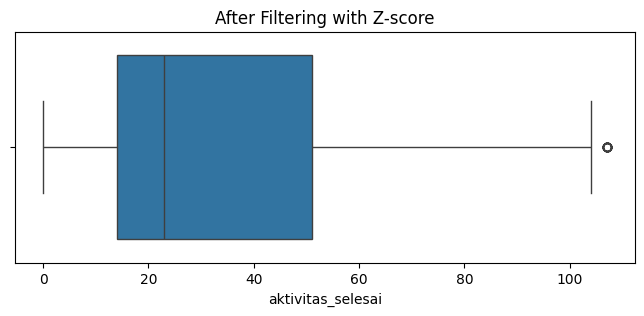

In [54]:
# Visualisasi setelah filtering
plt.figure(figsize=(8, 3))
sns.boxplot(x='aktivitas_selesai', data=df_p2)
plt.title("After Filtering with Z-score")
plt.show()

In [55]:
# memanggil fungsi filter_outlier, menggunakan dataframe data2 di atas
df_p3 = filter_outlier(df_p2, 'total_aktivitas')
print(df_p3.shape)


(4737, 16)


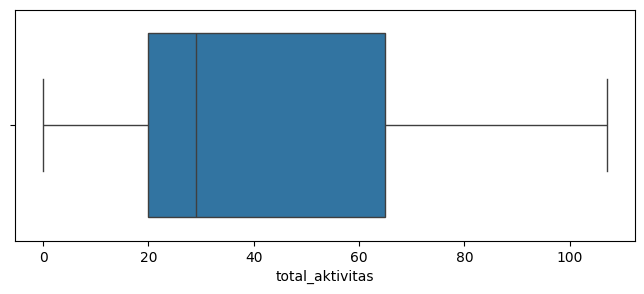

In [ ]:
#menampilkan visualisasi
plt.figure(figsize=(8, 3))
sns.boxplot(x= 'total_aktivitas', data=df_p3)
plt.show()

In [56]:
df_p3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4737 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          4737 non-null   int64         
 1   id_pengguna             4737 non-null   object        
 2   nama_pengguna           4737 non-null   object        
 3   tanggal_lahir           4737 non-null   object        
 4   jenis_kelamin           4737 non-null   object        
 5   id_kelas                4737 non-null   object        
 6   nama_kelas              4737 non-null   object        
 7   bidang_studi            4737 non-null   object        
 8   tanggal_mendaftar       4737 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  4737 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4737 non-null   datetime64[ns]
 11  aktivitas_selesai       4737 non-null   int64         
 12  total_aktivitas         4737 non-null   int64        

In [57]:
df_p3.shape

(4737, 16)

In [58]:
df_p3.head()

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,MAH****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,review sudah terisi
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Laki-laki,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,review sudah terisi
3,4,00dfe9a7199b926b061f833264887595,VIR******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,review sudah terisi
4,5,d3c27944d155d39dc085fe5eeb81c30b,NOF***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,review sudah terisi
8,9,dfdf5b2e198827b70a8828308b099cbd,HAR*************,1997-05-20,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Komputer Akuntansi,2020-04-24,2023-09-18 16:15:18,2020-04-24 08:13:45,52,55,100.0,4.0,review sudah terisi


# EDA

## NO 1
Bidang studi apakah yang paling banyak diminati saat >= April 2020 dan setelah pandemi berakhir (>= 1 Januari 2023)?


**Bidang studi yang paling banyak diminati saat pandemi (>= April 2020)**

Question: Saat pandemi ini hanya dalam rentang >= April 2020 - <= Januari 2023 atau >= April 2020 (Karena kalau ini berarti setelah januari 2023 juga terhitung)

**1. Saat pandemi ini hanya dalam rentang >= April 2020 - <= Januari 2023**

In [62]:
# Filter data untuk >= April 2020 and < January 2023
df_sebelum2023 = df_p3[(df_p3['tanggal_mendaftar'] >= '2020-04-01') & (df_p3['tanggal_mendaftar'] < '2023-01-01')]

In [64]:
# Menghitung jumlah pendaftaran per bidang studi selama pandemi (April 2020 - Desember 2022)
study_field_count_before2023 = df_sebelum2023['bidang_studi'].value_counts()

In [67]:
# Display the results
print("Study fields most popular before 2023:")
print(study_field_count_before2023)

Study fields most popular before 2023:
bidang_studi
Pendidikan & Pelatihan                   334
Bisnis Manajemen                         331
Digital & Teknologi                      237
Bisnis Layanan                           214
Bahasa Inggris                           135
                                        ... 
Aplikasi Pengolah Angka / Spreadsheet      1
Agama Kristen Protestan                    1
Bahasa Jepang                              1
Personal Project                           1
Storytelling                               1
Name: count, Length: 182, dtype: int64


Text(0, 0.5, 'Study Field')

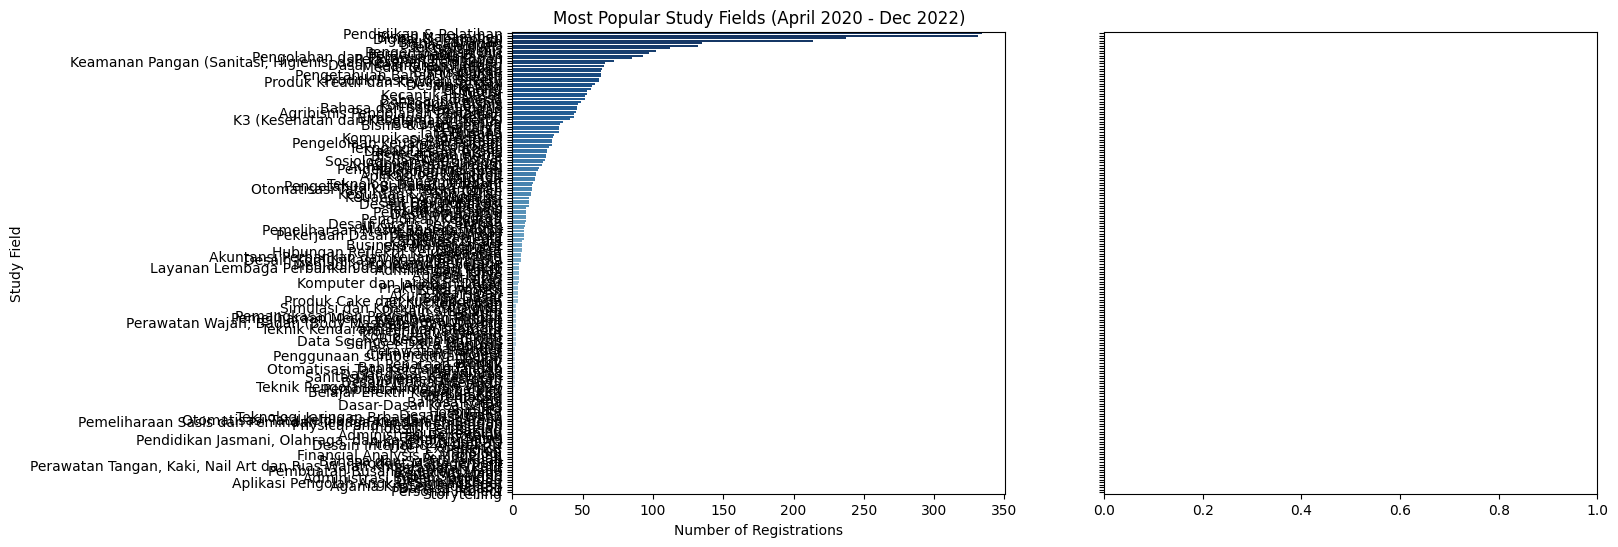

In [70]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for registrations during the pandemic
sns.barplot(
    x=study_field_count_before2023.values,
    y=study_field_count_before2023.index,
    palette="Blues_r",
    ax=axes[0]
)
axes[0].set_title("Most Popular Study Fields (April 2020 - Dec 2022)")
axes[0].set_xlabel("Number of Registrations")
axes[0].set_ylabel("Study Field")

**2. setelah pandemi berakhir (>= 1 Januari 2023)?**

In [63]:
# Filter data untuk >= January 2023
df_setelah2023 = df_p3[df_p3['tanggal_mendaftar'] >= '2023-01-01']

In [65]:
# Hitung jumlah pendaftaran per bidang studi setelah pandemi (Januari 2023 dan seterusnya)
study_field_count_after2023 = df_setelah2023['bidang_studi'].value_counts().reset_index()

In [69]:
print("\nStudy fields most popular after January 2023:")
print(study_field_count_after2023)


Study fields most popular after January 2023:
                bidang_studi  count
0          Administrasi Umum     21
1                  Marketing     19
2           Bisnis Manajemen     17
3               Administrasi     17
4          Komunikasi Bisnis     16
..                       ...    ...
111                   Desain      1
112       Teknik Kelistrikan      1
113  Dasar-Dasar Kreativitas      1
114      Hardware & Robotics      1
115              Agama Budha      1

[116 rows x 2 columns]


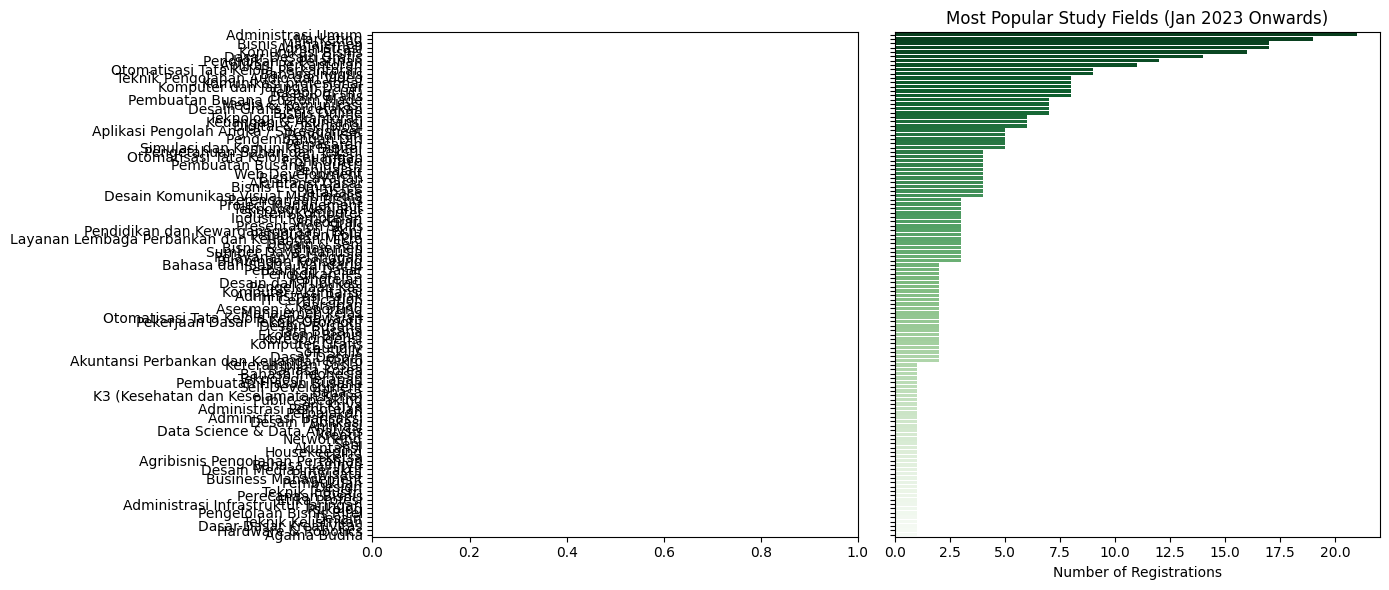

In [74]:
# Create subplots with the correct number of axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Convert to Pandas Series explicitly if needed
study_field_count_after2023 = df_setelah2023['bidang_studi'].value_counts()

# Plot for registrations after the pandemic
sns.barplot(
    x=study_field_count_after2023.values,  # Values for the x-axis
    y=study_field_count_after2023.index,  # Corresponding labels for the y-axis
    palette="Greens_r",
    ax=axes[1]
)
axes[1].set_title("Most Popular Study Fields (Jan 2023 Onwards)")
axes[1].set_xlabel("Number of Registrations")
axes[1].set_ylabel("")  # No ylabel for the second chart

# Adjust layout
plt.tight_layout()
plt.show()

# No.2

Bagaimana tren bulanan pendaftaran kelas untuk setiap bidang studi saat dan setelah pandemi?

In [83]:
# Pastikan kolom tanggal sudah dalam format datetime
df_p3['tanggal_mendaftar'] = pd.to_datetime(df_p3['tanggal_mendaftar'])
df_p3['tanggal_menyelesaikan'] = pd.to_datetime(df_p3['tanggal_menyelesaikan'])


In [84]:
# Hitung durasi kelas (dalam hari)
df_p3['durasi_kelas'] = (df_p3['tanggal_menyelesaikan'] - df_p3['tanggal_mendaftar']).dt.days
df_p3['durasi_kelas'] = df_p3['durasi_kelas'].fillna(0)  # Isi NaT dengan 0 atau nilai default

In [85]:
# Tambahkan kolom bulan dan tahun untuk analisis bulanan
df_p3['bulan_tahun'] = df_p3['tanggal_mendaftar'].dt.to_period('M')

In [86]:
# Filter data untuk saat pandemi (April 2020 - Desember 2022) dan setelah pandemi (Januari 2023 ke atas)
df_before2023 = df_p3[(df_p3['tanggal_mendaftar'] >= '2020-04-01') & (df_p3['tanggal_mendaftar'] < '2023-01-01')]
df_after2023 = df_p3[df_p3['tanggal_mendaftar'] >= '2023-01-01']

In [87]:
# Hitung jumlah pendaftaran per bulan dan bidang studi
monthly_registration_before2023 = df_before2023.groupby(['bulan_tahun', 'bidang_studi']).size().reset_index(name='jumlah_pendaftaran')
monthly_registration_after2023 = df_after2023.groupby(['bulan_tahun', 'bidang_studi']).size().reset_index(name='jumlah_pendaftaran')

In [88]:
# Hitung rata-rata durasi kelas per bulan dan bidang studi
avg_duration_before2023 = df_before2023.groupby(['bulan_tahun', 'bidang_studi'])['durasi_kelas'].mean().reset_index(name='rata_rata_durasi')
avg_duration_after2023 = df_after2023.groupby(['bulan_tahun', 'bidang_studi'])['durasi_kelas'].mean().reset_index(name='rata_rata_durasi')

In [89]:
# Gabungkan jumlah pendaftaran dengan rata-rata durasi untuk analisis lebih lanjut
monthly_data_before2023 = pd.merge(monthly_registration_before2023, avg_duration_before2023, on=['bulan_tahun', 'bidang_studi'])
monthly_data_after2023 = pd.merge(monthly_registration_after2023, avg_duration_after2023, on=['bulan_tahun', 'bidang_studi'])

In [90]:
# Visualisasi tren pendaftaran dan rata-rata durasi
plt.figure(figsize=(14, 12))


<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

**1. Tren pendaftaran per bulan untuk sebelum pandemi**

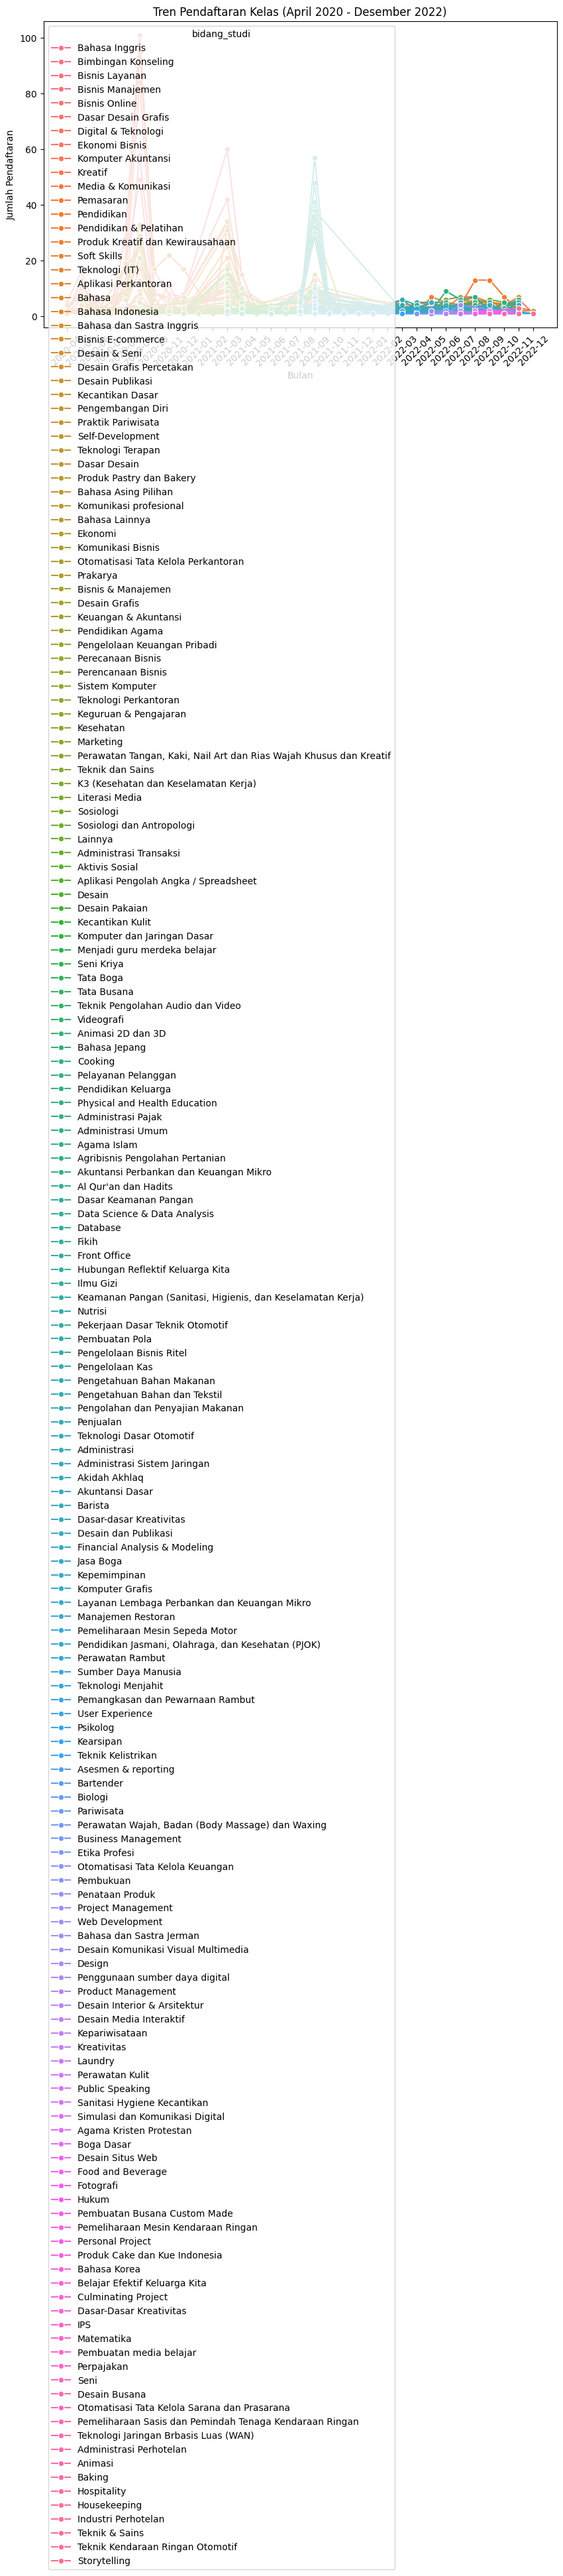

In [96]:
# Konversi kolom 'bulan_tahun' menjadi string
monthly_data_before2023['bulan_tahun'] = monthly_data_before2023['bulan_tahun'].astype(str)
monthly_data_after2023['bulan_tahun'] = monthly_data_after2023['bulan_tahun'].astype(str)

# Visualisasi Tren Pendaftaran Sebelum Pandemi
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data_before2023, x='bulan_tahun', y='jumlah_pendaftaran', hue='bidang_studi', marker='o')
plt.title('Tren Pendaftaran Kelas (April 2020 - Desember 2022)')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pendaftaran')
plt.tight_layout()
plt.show()


**2. Tren pendaftaran per bulan untuk setelah pandemi**

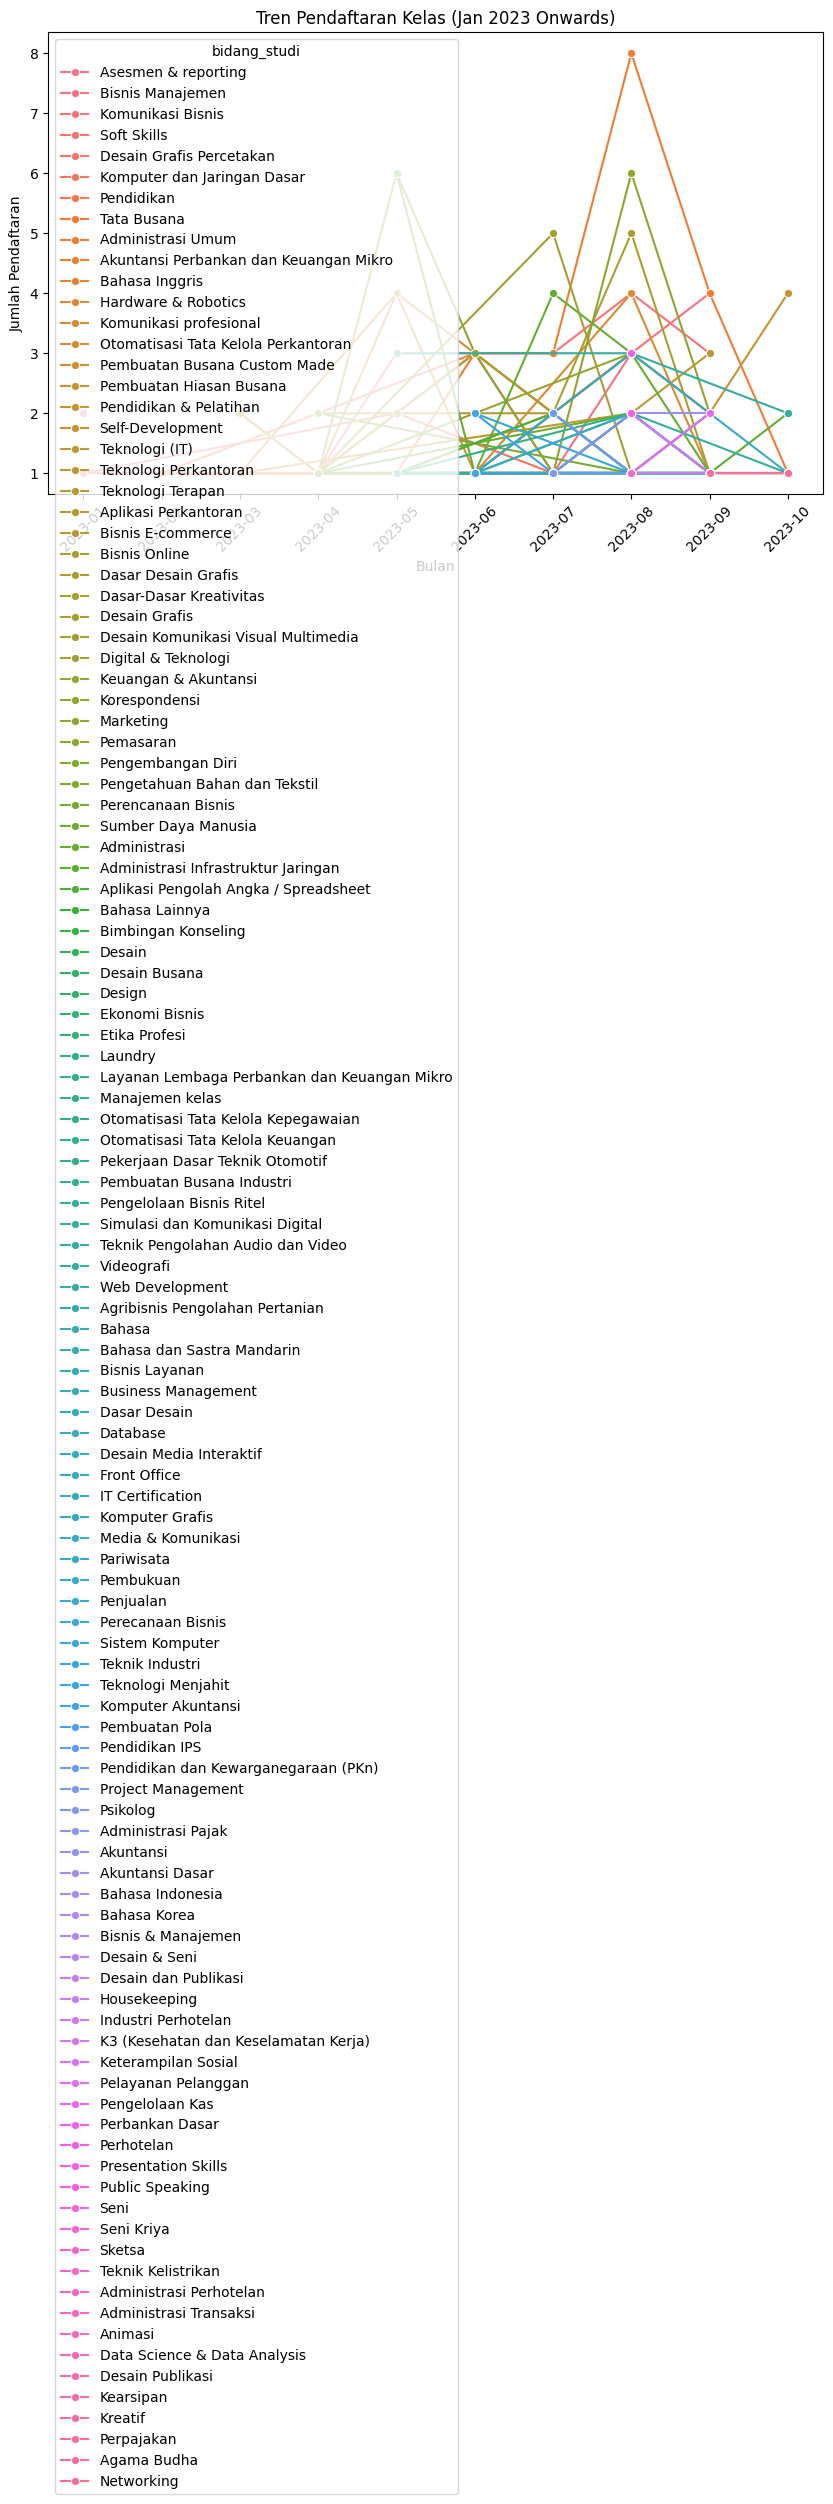

In [97]:
# Konversi kolom 'bulan_tahun' menjadi string
monthly_data_after2023['bulan_tahun'] = monthly_data_after2023['bulan_tahun'].astype(str)

# Visualisasi Tren Pendaftaran Setelah Pandemi
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data_after2023, x='bulan_tahun', y='jumlah_pendaftaran', hue='bidang_studi', marker='o')
plt.title('Tren Pendaftaran Kelas (Jan 2023 Onwards)')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pendaftaran')
plt.tight_layout()
plt.show()


**1. Tren rata-rata durasi kelas per bulan untuk sebelum pandemi**

In [98]:
print(monthly_data_before2023.dtypes)


bulan_tahun            object
bidang_studi           object
jumlah_pendaftaran      int64
rata_rata_durasi      float64
dtype: object


In [99]:
monthly_data_before2023['rata_rata_durasi'] = pd.to_numeric(monthly_data_before2023['rata_rata_durasi'], errors='coerce')

Text(0, 0.5, 'Rata-rata Durasi Kelas (Hari)')

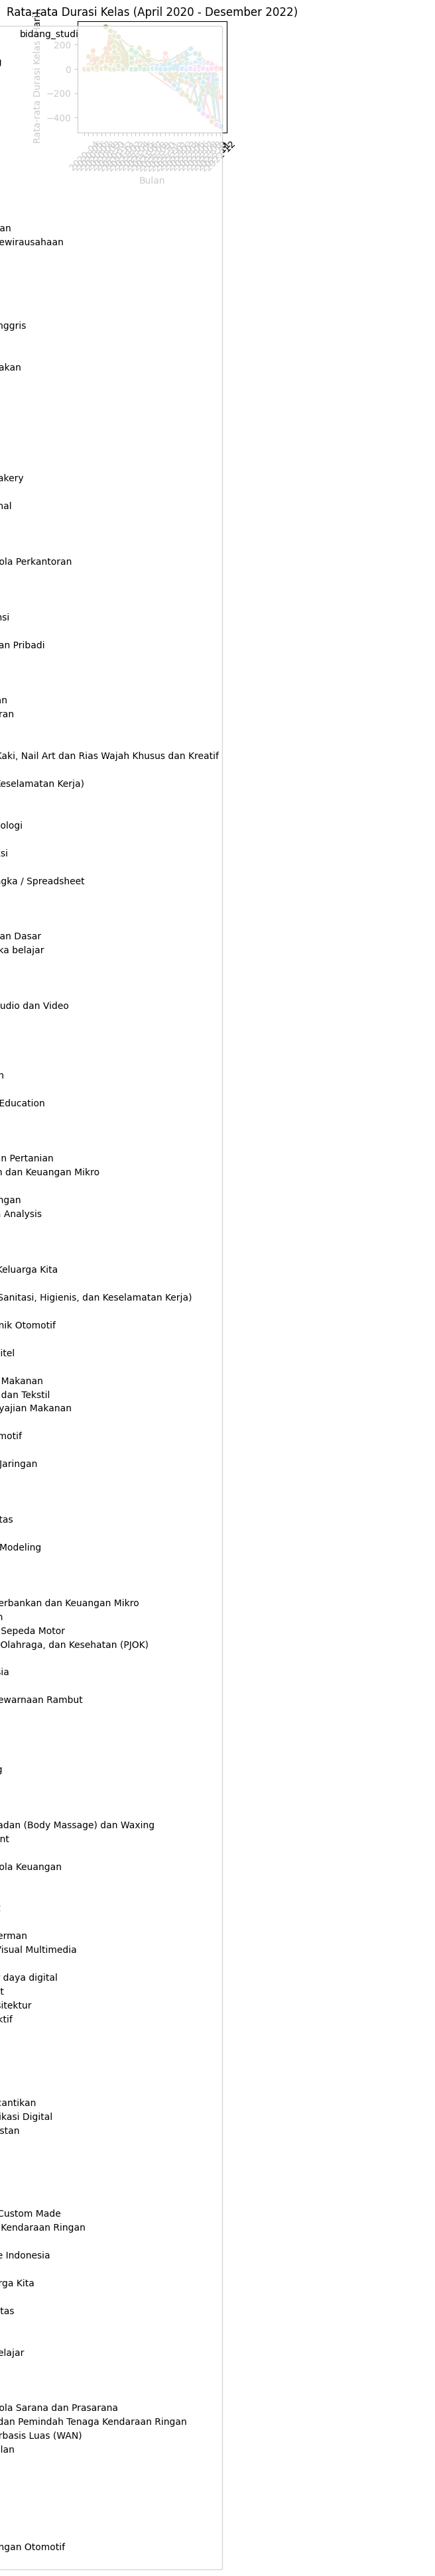

In [100]:
plt.subplot(2, 2, 3)
sns.lineplot(data=monthly_data_before2023, x='bulan_tahun', y='rata_rata_durasi', hue='bidang_studi', marker='o')
plt.title('Rata-rata Durasi Kelas (April 2020 - Desember 2022)')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Durasi Kelas (Hari)')

**2. Tren rata-rata durasi kelas per bulan untuk setelah pandemi**

In [101]:
print(monthly_data_after2023.dtypes)

bulan_tahun            object
bidang_studi           object
jumlah_pendaftaran      int64
rata_rata_durasi      float64
dtype: object


In [102]:
monthly_data_after2023['rata_rata_durasi'] = pd.to_numeric(monthly_data_after2023['rata_rata_durasi'], errors='coerce')


Text(0, 0.5, 'Rata-rata Durasi Kelas (Hari)')

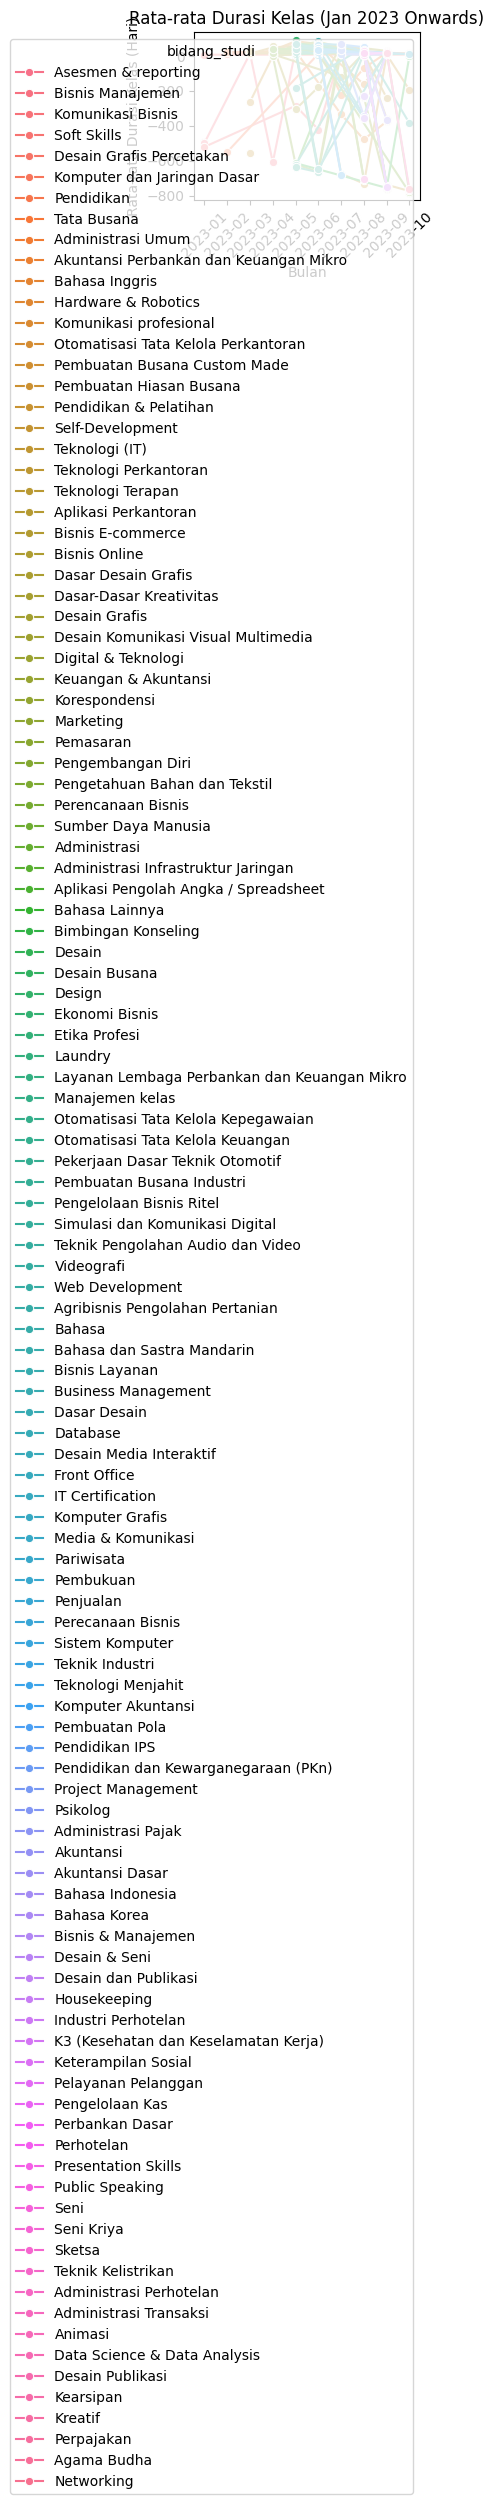

In [103]:
plt.subplot(2, 2, 4)
sns.lineplot(data=monthly_data_after2023, x='bulan_tahun', y='rata_rata_durasi', hue='bidang_studi', marker='o')
plt.title('Rata-rata Durasi Kelas (Jan 2023 Onwards)')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Durasi Kelas (Hari)')


In [95]:
# Penyesuaian layout agar tampilan lebih rapi
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## NO. 3
Berapa persen besar pengguna yang memiliki lebih dari 1 kelas yang diminati?

In [ ]:
# penguna yang memiliki lebih dari 1 kelas
df_pengguna_multi = df_p3.groupby('id_pengguna').filter(lambda id_kelas: len(id_kelas) > 1)
df_pengguna_multi.head()

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
138,139,e3569e7f665a24d8459bb6580bc496aa,SUB*****,1975-07-02,Laki-laki,2ddb4ffe914012cb27e26d124bacd689,Mem***************************************,Media & Komunikasi,2020-05-12,2023-09-18 16:15:18,2020-05-12 15:49:27,7,16,92.0,5.0,review sudah terisi
300,301,e3569e7f665a24d8459bb6580bc496aa,SUB*****,1975-07-02,Laki-laki,37efdc10008e42e357985c03cf80241a,Des**********************************,Teknologi Terapan,2020-06-20,2023-09-18 16:15:18,2020-06-20 03:15:21,7,7,90.0,5.0,review sudah terisi
396,397,952819a5d5f520c531f41e6644db1e0b,SUD*****,1984-03-06,Laki-laki,262cf9b725395d261f41ca335b0418c5,Men*******************************************...,Bisnis Manajemen,2020-08-28,2023-09-18 16:15:18,2020-08-31 22:50:16,0,29,82.5,5.0,review sudah terisi
401,402,952819a5d5f520c531f41e6644db1e0b,SUD*****,1984-03-06,Laki-laki,262cf9b725395d261f41ca335b0418c5,Men*******************************************...,Teknologi (IT),2020-08-28,2023-09-18 16:15:18,2020-08-31 22:50:16,0,29,82.5,5.0,review sudah terisi
509,510,5da26b6ab067a61558a84c9af0d0551f,MAS*******,1984-04-19,Laki-laki,262cf9b725395d261f41ca335b0418c5,Men*******************************************...,Bahasa Indonesia,2020-08-31,2023-09-18 16:15:18,2020-09-05 05:30:17,0,29,82.5,5.0,review sudah terisi


In [ ]:
# persen pengguna yang memiliki lebih dari 1 kelas yang diminati
persen_pengguna_multi = (len(df_pengguna_multi['id_pengguna'].unique()) / len(df_project['id_pengguna'].unique())) * 100
persen_pengguna_multi

1.3086558235184147

## NO. 4
Tingkat reedom voucher yang tinggi

In [105]:
# Misalkan 'data' adalah DataFrame yang memuat tabel yang disebutkan
data = pd.read_excel('Project4_1A.xlsx')

# Menghitung Jumlah Kelas yang Diikuti per pengguna
jumlah_kelas = data.groupby('id_pengguna')['id_kelas'].nunique().reset_index(name='jumlah_kelas')

# Menghitung Frekuensi Akses (dalam hal ini berdasarkan tanggal terakhir akses)
data['tanggal_terakhir_akses'] = pd.to_datetime(data['tanggal_terakhir_akses'])
data['frekuensi_akses'] = data.groupby('id_pengguna')['tanggal_terakhir_akses'].transform('count')

# Menghitung Durasi Belajar (dari tanggal mendaftar ke tanggal terakhir akses atau selesai)
data['tanggal_mendaftar'] = pd.to_datetime(data['tanggal_mendaftar'])
data['tanggal_menyelesaikan'] = pd.to_datetime(data['tanggal_menyelesaikan'])
data['durasi_belajar'] = (data['tanggal_terakhir_akses'] - data['tanggal_mendaftar']).dt.days

# Menghitung Nilai Transaksi (menggunakan skor akhir atau rating kelas)
data['nilai_transaksi'] = data['skor_akhir'] * data['rating_kelas']

# Gabungkan jumlah kelas yang dihitung ke dalam data utama
data = pd.merge(data, jumlah_kelas, on='id_pengguna', how='left')

# Gabungkan semua metrik yang dihitung untuk setiap pengguna
user_metrics = data.groupby('id_pengguna').agg({
    'jumlah_kelas': 'max',
    'frekuensi_akses': 'max',
    'durasi_belajar': 'max',
    'nilai_transaksi': 'sum'
}).reset_index()

# Normalisasi atau Skoring Metrik
# Asumsikan skala skor dari 1-10 untuk setiap metrik, kita bisa menggunakan skala atau transformasi yang sesuai
user_metrics['skor_total'] = (
    user_metrics['jumlah_kelas'] * 0.25 +
    user_metrics['frekuensi_akses'] * 0.25 +
    user_metrics['durasi_belajar'] * 0.25 +
    user_metrics['nilai_transaksi'] * 0.25
)

# Tentukan Tingkat Freedom Voucher
# Misalnya, jika skor_total lebih tinggi dari nilai tertentu, anggap sebagai "tinggi"
user_metrics['tingkat_voucher'] = user_metrics['skor_total'].apply(lambda x: 'Tinggi' if x > 7 else 'Rendah')

# Tampilkan hasil
print(user_metrics[['id_pengguna', 'skor_total', 'tingkat_voucher']])

                           id_pengguna  skor_total tingkat_voucher
0     00027f68f39686d533ebc10c83d9887f      73.250          Tinggi
1     0002f872b6673a3df109e1a17ae2a7be      83.625          Tinggi
2     0022481b03794aed232be95fbd4cb99e     114.875          Tinggi
3     0028252c274cfb8658291a60ccd90646     125.500          Tinggi
4     002ad432c1b8bee463327c51efc3b55f     100.000          Tinggi
...                                ...         ...             ...
5344  ffbd8094a02871b42c0eb8728310a60e     111.125          Tinggi
5345  ffe2c37404bb8d0cad95f6b22bf6b8db     275.750          Tinggi
5346  fff6b1913698c47cc04ff5a08a25b498     254.500          Tinggi
5347  fffb9a82eee7b384e8fb0fca7f028ef0     278.000          Tinggi
5348  ffffadbc2701949b0024a826a7e5319b      52.000          Tinggi

[5349 rows x 3 columns]
